# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



### Question 1:

$P(pass) = 0.9$

$P(quick \mid pass) = 0.6$

$P(quick \mid fail) = 0.3$

Using Bayes Rule we can calculate $P(Pass \mid Quick)$

$P(Pass \mid Quick) = \frac{P(Quick \mid Pass) \cdot P(Pass)}{P(Quick \mid Pass) \cdot P(Pass) + P(Quick \mid Fail) \cdot P(Fail)}$ = $\frac{0.6 \cdot 0.9}{0.6 \cdot 0.9 + 0.3 \cdot (1 - 0.9)}$ = 0.9474


In [1]:
# Question 1:

p_pass = 0.9
p_quick_given_pass = 0.6
p_quick_given_fail = 0.3

# We want to find P(Pass | Quick)
# Using bayes rule we know that P(A | B) = (P(B | A) * P(A)) / (P(B | A)* P(A) + P(B | A^c) * P(A^c))
p_pass_given_quick = (p_quick_given_pass * p_pass) / (p_quick_given_pass * p_pass + p_quick_given_fail * (1 - p_pass))
p_pass_given_quick



0.9473684210526315

### Question 2

Since the Dirichlet distribution is a conjugate prior for the Multinomial distribution. Thus the posterior also follows a Dirichlet distribution with the parameters $\alpha_{posterior} = \alpha + x$ where x are the counts of each category from the multinomial distribution.

Proof:

$p(\theta \mid \alpha)$ = $\frac{\Gamma({\Sigma_{i=1}^{n}\alpha_{i}})}{\Pi_{i=1}^{n}\Gamma(\alpha_{i})}$ $\Pi_{i=1}^{n}\theta_i^{\alpha_i - 1}$

$p(x \mid \theta, n)$ = $\frac{n!}{x_1!, x_2!\dots,x_n!}$$\Pi_{i=1}^{n}\theta_i^{x_i}$

We know that $P(\theta \mid x, n, \alpha) \propto{} P(x \mid \theta, n) \cdot P(\theta \mid \alpha)$ ⇒ $P(\theta \mid x,n,\alpha)\propto{} \Pi_{i=1}^{n}\theta_i^{\alpha_i - 1} \cdot \Pi_{i=1}^{n}\theta_i^{x_i} = $ $\Pi_{i=1}^{n}\theta_i^{(\alpha_i + x_i) - 1}$.

This is exactly the Dirichlet distribution with $\alpha_{posterior} = \alpha_{prior} + x$.

### Question 3:

In [2]:
!pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00


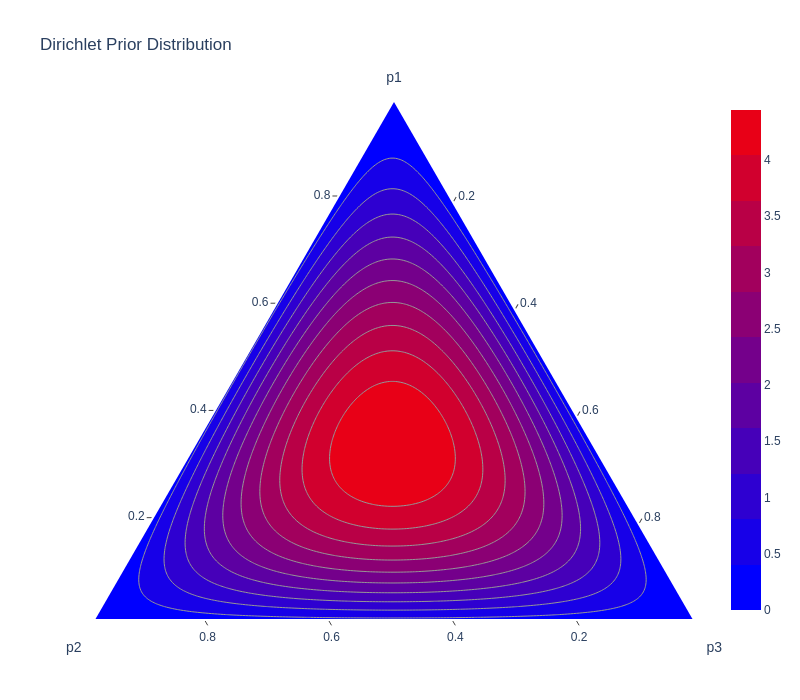

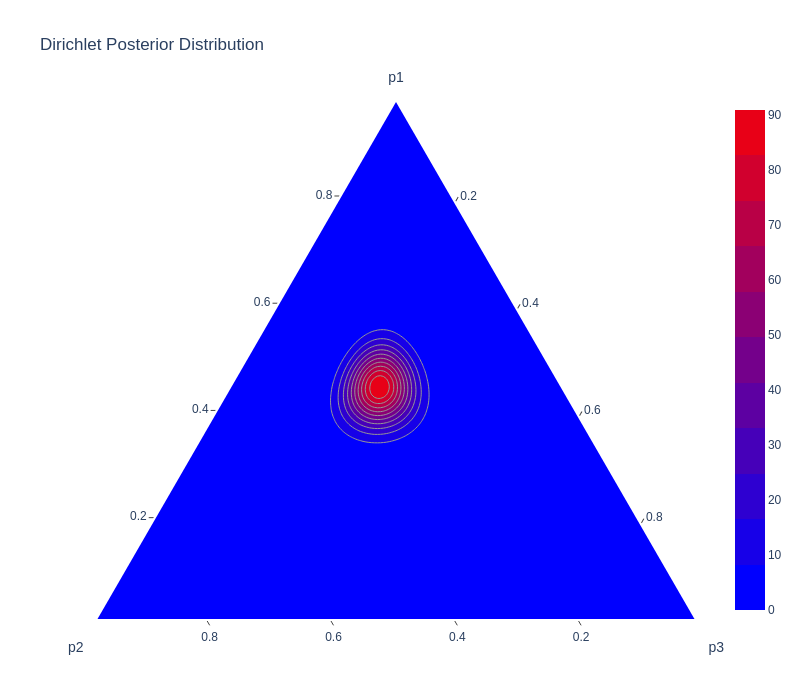

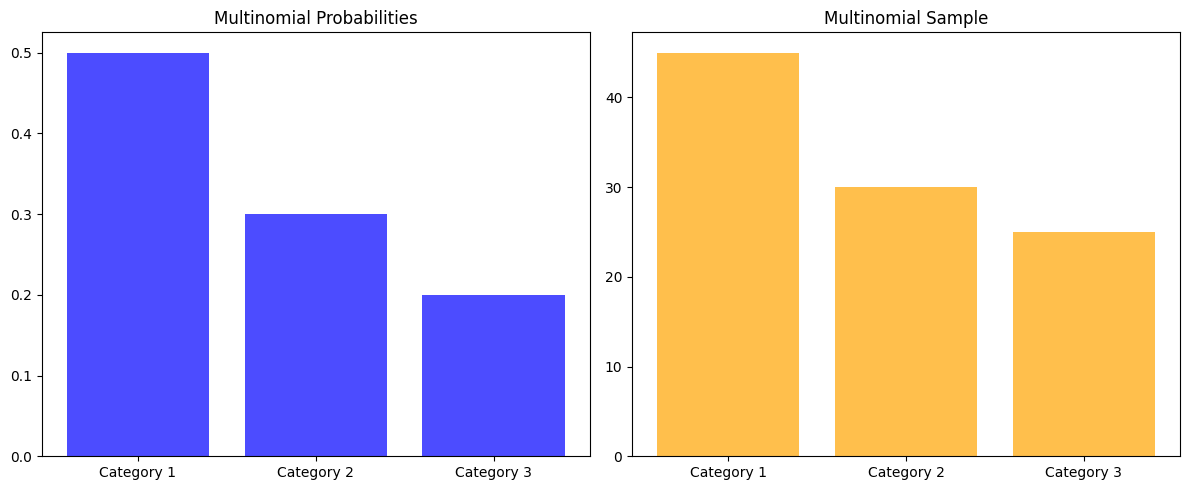

In [5]:
import numpy as np
from scipy.stats import multinomial, dirichlet
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Multinomial sample
n_trials = 100
probabilities = [0.5, 0.3, 0.2]
multinomial_sample = multinomial.rvs(n=n_trials, p=probabilities)

# Dirichlet prior and posterior
alpha_prior = np.array([2, 2, 2])
alpha_posterior = alpha_prior + multinomial_sample

p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Compute PDF values
prior_pdf = dirichlet(alpha_prior).pdf(p.T)
posterior_pdf = dirichlet(alpha_posterior).pdf(p.T)

# Create prior ternary plot
fig_prior = ff.create_ternary_contour(
    coordinates=p.T,
    values=prior_pdf,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    ncontours=10,
    showscale=True
)

# Create posterior ternary plot
fig_posterior = ff.create_ternary_contour(
    coordinates=p.T,
    values=posterior_pdf,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    ncontours=10,
    showscale=True
)


fig_prior.update_layout(title="Dirichlet Prior Distribution", height=700, width=800)
fig_posterior.update_layout(title="Dirichlet Posterior Distribution", height=700, width=800)

# Show both plots
fig_prior.show("png")
fig_posterior.show("png")

# Bar plots for multinomial probabilities and sample
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(['Category 1', 'Category 2', 'Category 3'], probabilities, color='blue', alpha=0.7)
axs[0].set_title("Multinomial Probabilities")
axs[1].bar(['Category 1', 'Category 2', 'Category 3'], multinomial_sample, color='orange', alpha=0.7)
axs[1].set_title("Multinomial Sample")
plt.tight_layout()
plt.show("png")
